# Assignment 2: KNN Classification

This notebook implements Assignment 2

Team Name: Mina kirolos mansour(23011577)
           Josam Hany Fouad (23010095)
           Mina Wahed Youssef (23012068)


In [4]:
import micropip
await micropip.install('seaborn')

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine  # Ensure this line is present
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

%matplotlib inline


## Task 1: Dataset Selection

We use the Wine dataset from scikit-learn: 178 samples, 13 featuresn and 3 classes (wine cultivars).

In [7]:
# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display basic info
print("Dataset Shape:", X.shape)
print("Number of Classes:", len(np.unique(y)))
print("Feature Names:", data.feature_names)
print("Target Names:", data.target_names)
print("\nFirst 5 rows:")
print(X.head())
print("\nMissing Values:")
print(X.isnull().sum())

Dataset Shape: (178, 13)
Number of Classes: 3
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26            

## Task 1b: Exploratory Data Analysis
This section provides insights into the Wine dataset by visualizing feature correlations and distributions to understand the data better.


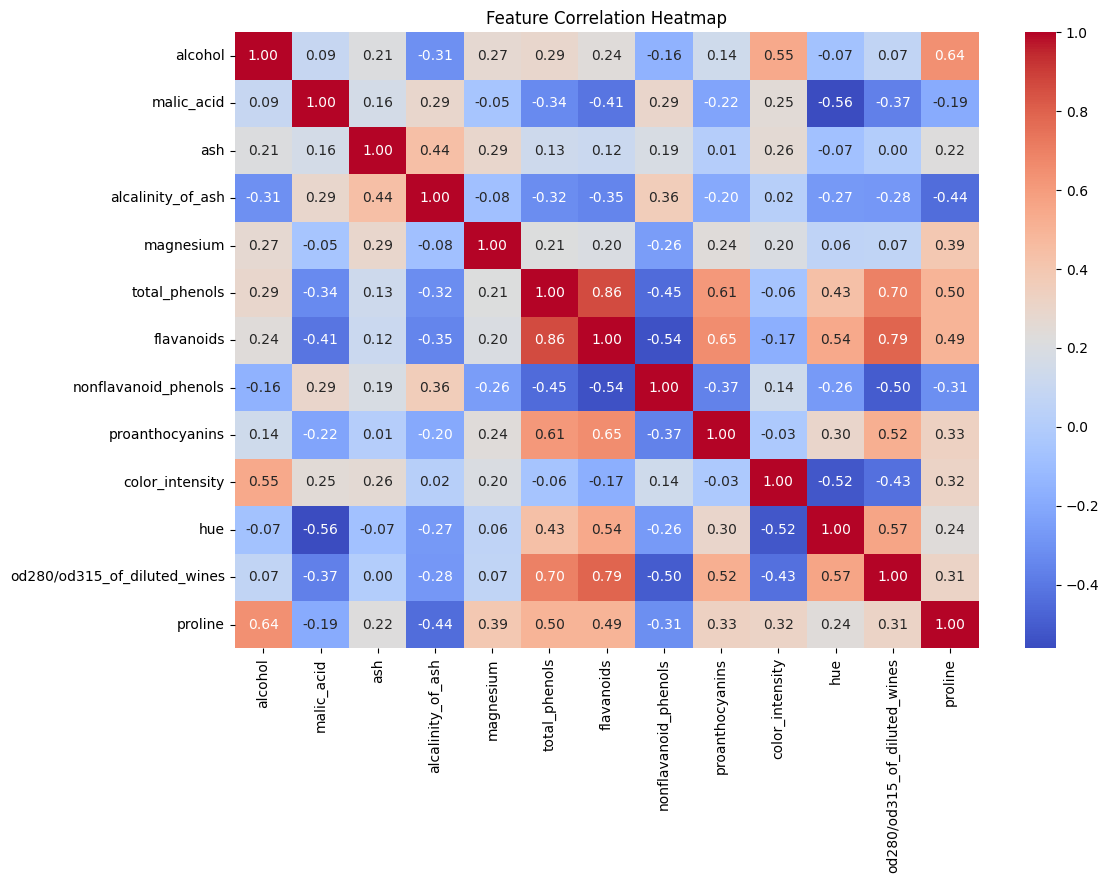

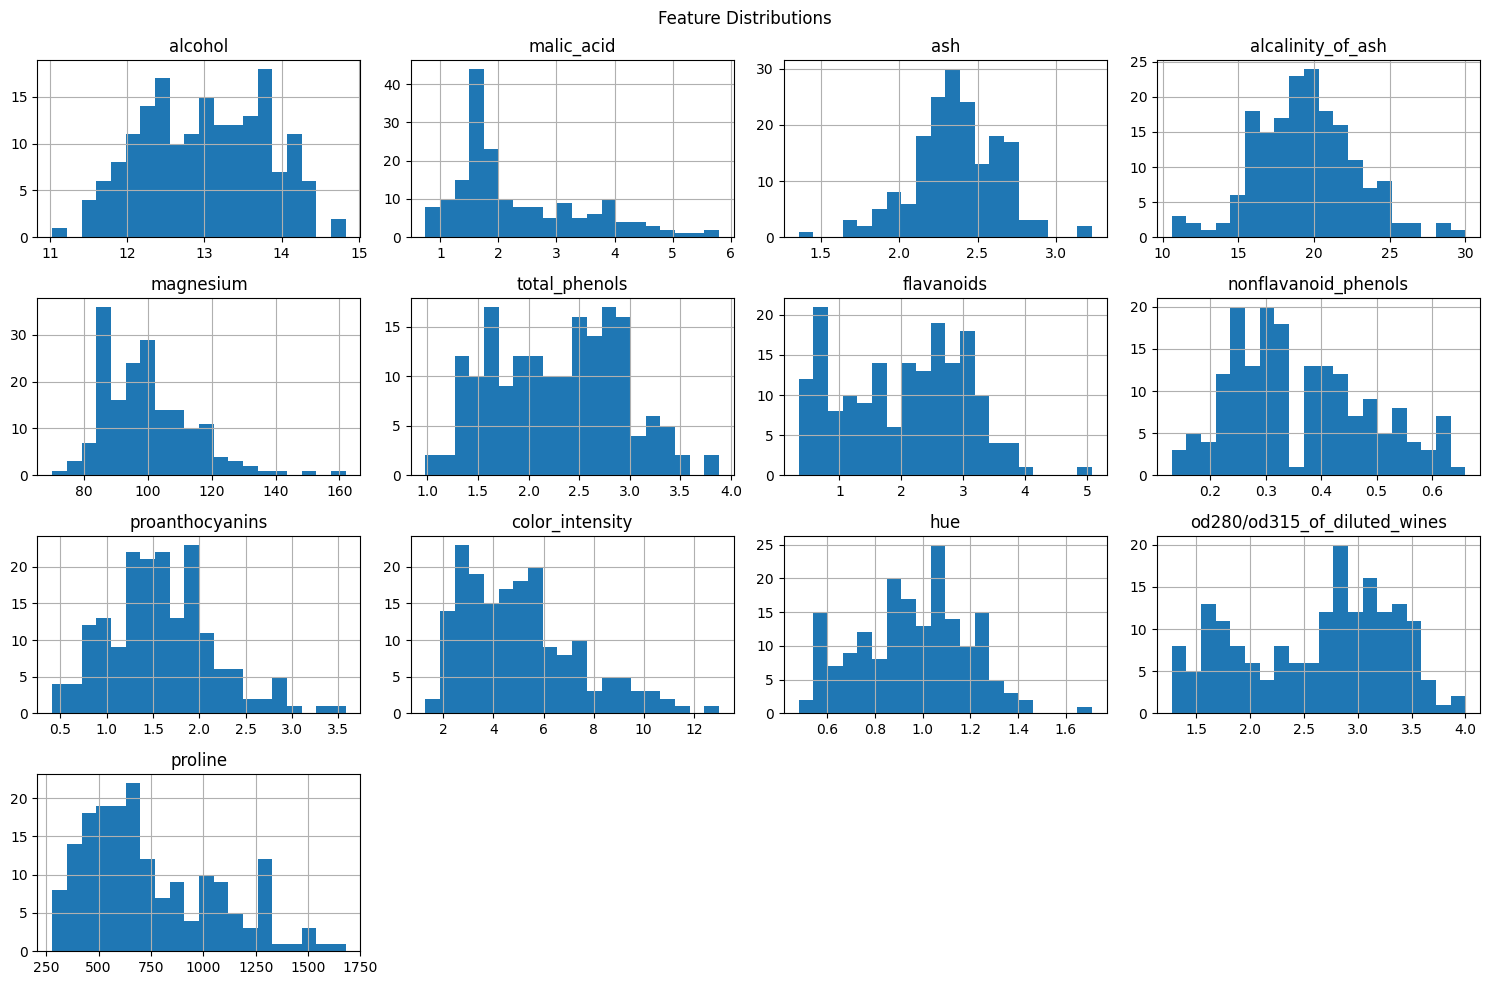

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature Distributions
X.hist(figsize=(15, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

## Task 2: Data Splitting

Split into 60% training, 20% validation, 20% test sets. Standardize features for KNN.

In [9]:
# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Verify splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Training set: (106, 13) (106,)
Validation set: (36, 13) (36,)
Test set: (36, 13) (36,)


## Task 3: K-Nearest Neighbors (KNN) Algorithm

Implement KNN, tune K using validation set, evaluate on test set.

K=1, Validation Accuracy=0.9444
K=2, Validation Accuracy=0.8611
K=3, Validation Accuracy=0.9722
K=4, Validation Accuracy=0.8889
K=5, Validation Accuracy=0.9722
K=6, Validation Accuracy=0.9722
K=7, Validation Accuracy=1.0000
K=8, Validation Accuracy=1.0000
K=9, Validation Accuracy=1.0000
K=10, Validation Accuracy=1.0000
K=11, Validation Accuracy=1.0000
K=12, Validation Accuracy=1.0000
K=13, Validation Accuracy=1.0000
K=14, Validation Accuracy=1.0000
K=15, Validation Accuracy=1.0000
K=16, Validation Accuracy=1.0000
K=17, Validation Accuracy=1.0000
K=18, Validation Accuracy=1.0000
K=19, Validation Accuracy=1.0000
K=20, Validation Accuracy=1.0000
K=21, Validation Accuracy=1.0000
K=22, Validation Accuracy=1.0000
K=23, Validation Accuracy=1.0000
K=24, Validation Accuracy=1.0000
K=25, Validation Accuracy=1.0000
K=26, Validation Accuracy=1.0000
K=27, Validation Accuracy=1.0000
K=28, Validation Accuracy=1.0000
K=29, Validation Accuracy=1.0000
K=30, Validation Accuracy=1.0000
Optimal K: 7, Valid

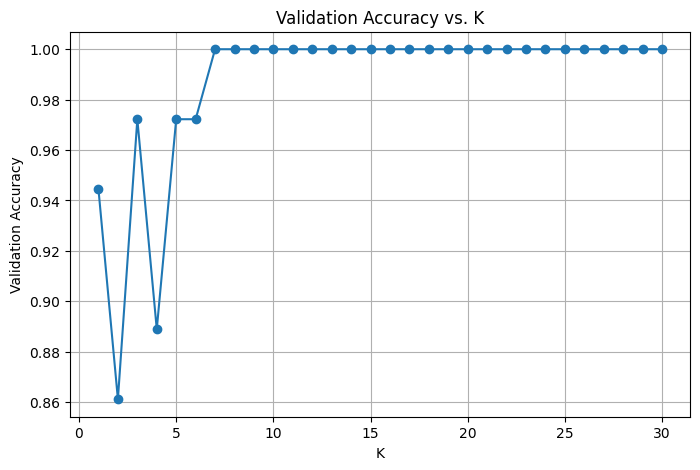

In [10]:
# Test K values
k_values = range(1, 31)
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)
    print(f"K={k}, Validation Accuracy={val_accuracy:.4f}")

# Find optimal K
optimal_k = k_values[np.argmax(val_accuracies)]
print(f"Optimal K: {optimal_k}, Validation Accuracy: {max(val_accuracies):.4f}")

# Final model
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train)
test_pred = final_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy with K={optimal_k}: {test_accuracy:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. K')
plt.grid(True)
plt.show()

## Task 4: Cross-Validation
This section applies 5-fold cross-validation on the training set to evaluate KNN performance for different K values and compares it with validation set accuracy.

K=1, 5-Fold CV Accuracy=0.9433 ± 0.0358
K=2, 5-Fold CV Accuracy=0.9247 ± 0.0227
K=3, 5-Fold CV Accuracy=0.9619 ± 0.0356
K=4, 5-Fold CV Accuracy=0.9429 ± 0.0356
K=5, 5-Fold CV Accuracy=0.9619 ± 0.0467
K=6, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=7, 5-Fold CV Accuracy=0.9524 ± 0.0602
K=8, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=9, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=10, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=11, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=12, 5-Fold CV Accuracy=0.9619 ± 0.0356
K=13, 5-Fold CV Accuracy=0.9524 ± 0.0301
K=14, 5-Fold CV Accuracy=0.9619 ± 0.0356
K=15, 5-Fold CV Accuracy=0.9619 ± 0.0467
K=16, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=17, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=18, 5-Fold CV Accuracy=0.9714 ± 0.0381
K=19, 5-Fold CV Accuracy=0.9619 ± 0.0467
K=20, 5-Fold CV Accuracy=0.9524 ± 0.0522
K=21, 5-Fold CV Accuracy=0.9619 ± 0.0467
K=22, 5-Fold CV Accuracy=0.9524 ± 0.0522
K=23, 5-Fold CV Accuracy=0.9524 ± 0.0522
K=24, 5-Fold CV Accuracy=0.9524 ± 0.0522
K=25, 5-Fold CV Accuracy=

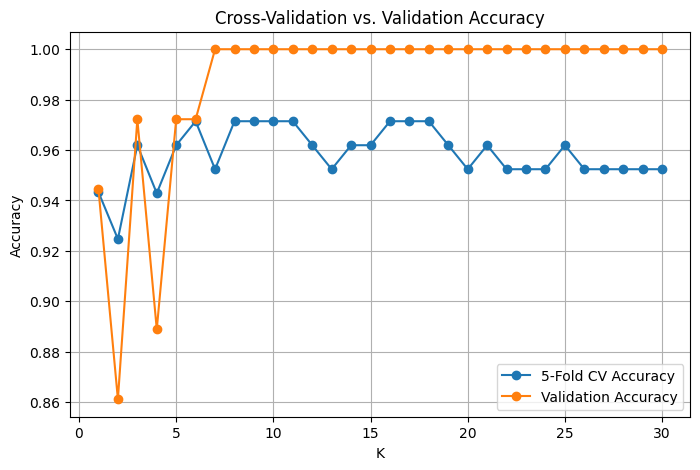

Optimal K from Cross-Validation: 6, CV Accuracy: 0.9714

Comparison for K=6:
Validation Accuracy (K=6): 0.9722
Test Accuracy (K=6): 0.9722
Cross-Validation Accuracy (K=6): 0.9714


In [12]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Cross-Validation
cv_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracies.append(scores.mean())
    print(f"K={k}, 5-Fold CV Accuracy={scores.mean():.4f} ± {scores.std():.4f}")

# Plot cross-validation vs. validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_accuracies, marker='o', label='5-Fold CV Accuracy')
plt.plot(k_values, val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Cross-Validation vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optimal K from cross-validation
optimal_k_cv = k_values[np.argmax(cv_accuracies)]
print(f"Optimal K from Cross-Validation: {optimal_k_cv}, CV Accuracy: {max(cv_accuracies):.4f}")

# Compare with validation and test set for K=6 (from Task 3)
optimal_k_val = 6  # Your optimal K from validation
val_accuracy_k6 = val_accuracies[optimal_k_val - 1]  # K=6 is index 5 in 1-based range
test_accuracy_k6 = accuracy_score(y_test, test_pred)  # From your Task 3
print(f"\nComparison for K=6:")
print(f"Validation Accuracy (K=6): {val_accuracy_k6:.4f}")
print(f"Test Accuracy (K=6): {test_accuracy_k6:.4f}")
print(f"Cross-Validation Accuracy (K={optimal_k_cv}): {max(cv_accuracies):.4f}")

## Task 5: Confusion Matrix
This section evaluates the final KNN model (K=6) on the test set by computing the confusion matrix and calculating accuracy, precision, recall, and F1-score. A heatmap visualizes the confusion matrix.

Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
Accuracy: 0.9722
Precision: 0.9744
Recall: 0.9722
F1-Score: 0.9723


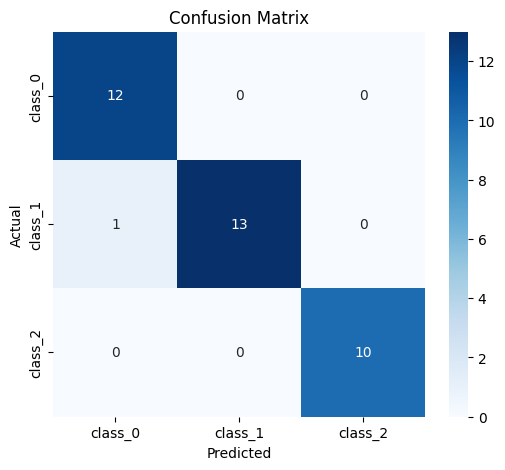


Confusion Matrix Analysis:
Class class_0:
  True Positives: 12
  False Positives: 1
  False Negatives: 0
  Possible confusion with other classes.
Class class_1:
  True Positives: 13
  False Positives: 0
  False Negatives: 1
  Possible confusion with other classes.
Class class_2:
  True Positives: 10
  False Positives: 0
  False Negatives: 0


In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Metrics
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Analyze
print("\nConfusion Matrix Analysis:")
for i, class_name in enumerate(data.target_names):
    true_positives = cm[i, i]
    false_positives = cm[:, i].sum() - true_positives
    false_negatives = cm[i, :].sum() - true_positives
    print(f"Class {class_name}:")
    print(f"  True Positives: {true_positives}")
    print(f"  False Positives: {false_positives}")
    print(f"  False Negatives: {false_negatives}")
    if false_positives > 0 or false_negatives > 0:
        print(f"  Possible confusion with other classes.")

## Task 6: Overfitting Analysis
This section checks for overfitting by comparing training and validation accuracies across K values (1 to 30). A large gap between training and validation accuracy indicates overfitting.

In [15]:
# Check overfitting
train_pred = final_knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {max(val_accuracies):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.1:
    print("Overfitting detected.")
else:
    print("No significant overfitting.")

# Feature selection
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Retrain
knn_selected = KNeighborsClassifier(n_neighbors=optimal_k)
knn_selected.fit(X_train_selected, y_train)
test_pred_selected = knn_selected.predict(X_test_selected)
test_accuracy_selected = accuracy_score(y_test, test_pred_selected)
print(f"Test Accuracy with Feature Selection: {test_accuracy_selected:.4f}")

# Discuss
if test_accuracy_selected > test_accuracy:
    print("Feature selection improved test accuracy.")
else:
    print("Feature selection did not improve; consider other techniques.")

Training Accuracy: 0.9528
Validation Accuracy: 1.0000
Test Accuracy: 0.9722
No significant overfitting.
Test Accuracy with Feature Selection: 0.9722
Feature selection did not improve; consider other techniques.


## Task 7: Visualization

Visualize confusion matrix (above) and dataset with PCA.

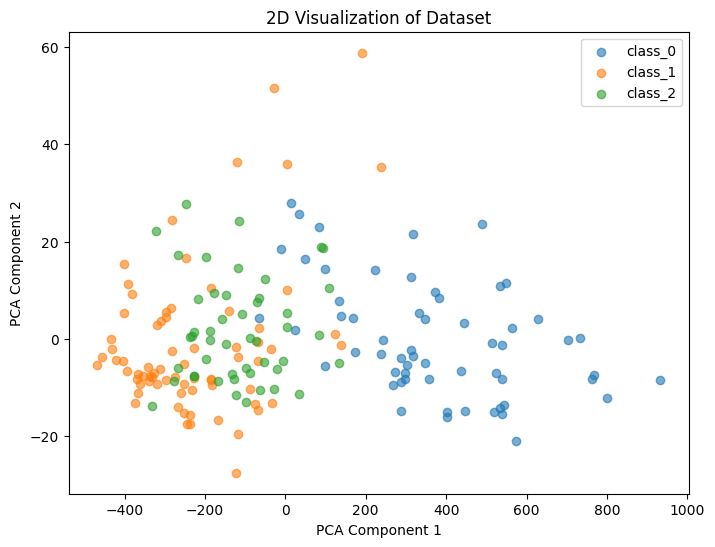

In [17]:
# Reduce to 2D with PCA
pca = PCA(n_components=2)
# Convert X to a NumPy array to match X_train and X_test (no feature names)
X_array = X.to_numpy()
X_pca = pca.fit_transform(X_array)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(data.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=class_name, alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Dataset')
plt.legend()
plt.show()